> 이번 챕터에서는 자연어 처리의 전처리 과정을 이해한다.

# 09-01 토큰화(Tokenization)

> 자연어처리에서 크롤링등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면, 데이터를 사용하고자 하는 용도에 맞게 토큰화&정제&정규화 하는일을 하게 됨

토큰화: 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업
- corpus: 말뭉치
- 보통 의미있는 단위로 토큰을 정의함

## 1. 단어 토큰화(Word Tokenization)

단어 토큰화(word tokenization): 토큰의 기준을 단어(word)로 하는 경우
- 다만, 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로 간주되기도 함

보통 토큰화는 단순히 구두점이나 특수 문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로는 해결되지 않는다.
- 구두점: 마침표(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등과 같은 기호

## 2. 토큰화 중 생기는 선택의 순간

토큰화의 기준을 생각해봐야하는 경우가 발생할 때에는, 해당 데이터를 가지고 어떤 용도로 사용할 것인지에 따라서 그 용도에 영향이 없는 기준으로 정하면 된다.

사용자가 원하는 결과가 나오도록 토큰화 도구를 설계할 수도 있지만, 기존에 공개된 도구를 사용할 수도 있음

***NLTK***

영어 코퍼스를 토큰화 하기 위한 도구를 제공함
- `word_tokenize`
- `WordPuctTokenizer`

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [ ]:
import nltk
# punkt 데이터 다운로드
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
print('단어 토큰화 1:', word_tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화 1: ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


`word_tokenize`
- Don't -> Do와 n't로 분리
- Jone's -> Jone과 's로 분리

In [ ]:
`word_tokenize`: Don't -> Do와 n't로 분리 / Jone's -> Jone과 's로 분리print('단어 토큰화2: ', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2:  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPuctTokenizer: 구두점을 별도로 분류하는 특징을 가짐
- Don't -> Don과 '와 t로 분리
- Jone's -> Jone과 '과 s로 분리

In [ ]:
print('단어 토큰화 3: ', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화 3:  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


`text_to_word_sequence`: keras에서 지원하는 토큰화 도구
- 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴파, 느낌표 등의 구두점을 제거함
- don't나 jone's와 같은 경우 어파스트로피(`'`)는 보존함

## 3. 토큰화에서 고려해야할 사항

> 토큰화 작업을 단순하게 코퍼스에서 구두점을 제외하고 공백기준으로 잘라내는 작업이라고 간주할수는 X

### 1) 구두점이나 특수 문자를 단순 제외해서는 안된다.

코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 함.

1. 마침표(.): 문장의 경계를 알 수 있는 데 도움이 됨
2. 단어 자체에 구두점을 가지고 있는 경우도 있음.
    - Ph.D나 AT&T
3. 특수 문자의 달러나 슬래시
    - $45.55
    - 01/02/06
4. 숫자 사이에 컴마(,)가 들어가는 경우
    - 123,456,789




### 2) 줄임말과 단어 내에 띄어쓰기가 있는 경우
영어권 언어의 어파스트로피(`'`)는 압축된 단어를 다시 펼치는 역할을 하기도 함.
- what're -> what are의 줄임말
- we're -> w are의 줄임말
- 위의 예에서 `re`를 **접어**(clitic)라고함.
- 접어: 단어가 줄임말로 쓰일 때 생기는 형태
    - I am -> I'm에서는 m을 접어라고 함.

하나의 단어 사이에 띄어쓰기가있는 경우에도 하나의 토큰으로 봐야하는 경우가 있을 수 있음. 이러한 단어들도 하나로 인식할 수 있어야함
- New York
- rock 'n' roll

### 3) 표준 토큰화 예제
표준으로 쓰이고 있는 토큰화 방법중 하나인 Penn Treebank Tokenization 규칙
- 규칙1. 하이푼(-)으로 구성된 단어는 하나로 유지한다.
- 규칙2. dosen't와 같이 어파스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print("트리뱅크 워드토크나이저 :", tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


home-based는 하나의 토큰으로 취급하며, dosen't의 경우 does와 n't로 분리됨

## 4. 문장 토큰화(Sentence Tokenization)

문장 토큰화(Sentence Tokenization): 갖고 있는 코퍼스 내에서 문장 단위로 구분하는 작업
- 문장 분류(sentence segmantation)라고 하기도 함
- 보통 갖고 있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장단위로 구분되어 있지 않아 용도에 맞게 문장 토큰화가 필요

***어떻게 코퍼스로부터 문장 단위로 분류할 수 있을까?***

직관적으로 ?나 마침표(.)나 ! 기준으로 문장을 잘라내면 된다고 생각할 수 있다.
- !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary)역할을 하지만, 마침표는 그렇지 않음.

```
EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.

EX2) Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.
```

위의 예제에 마침표를 기준으로 할 시, 문장의 끝이 나오기 전에 마침표가 여러번 등장하여 예상한 결과가 나오지 않게 된다.

즉, 사용하는 코퍼스가 어떤 국적의 언어인지, 해당 코퍼스 내에 특수문자들이 어떻게 사용되고 있는지에 따라 **직접 규칙들을 정의**해 보아야함


***NLTK***

NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않으며, 토큰화 도구를 지원

`sent_tokenize`: 영어 문장의 토큰화를 수행

In [ ]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."

print('문장 토큰화1: ', sent_tokenize(text))

문장 토큰화1:  ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [ ]:
# 문장 중간에 마침표가 다수 등장하는 경우에도 성공적으로 인식
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


***KSS(Korean Sentence Splitter)***

한국어에 대한 문장 토큰화 도구

In [ ]:
pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 54.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import kss
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 : ', kss.split_sentences(text))

한국어 문장 토큰화 :  ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


## 5. 한국어에서의 토큰화의 어려움

**영어**
- New York과 같은 합성어나 he's와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동함.
    - 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어져 -> **띄어쓰기 토큰화와 단어 토큰화가 거의 같기 때문.**

**한국어**
- 어절: 띄어쓰기의 단위가 되는 단위
- 어절 토큰화는 한국어 NLP에서 지양됨(사용되지 않음)
    - 어절 토큰화와 단어 토큰화가 같지 않기 때문.
    - 이는 **한국어**가 영어와는 다른 형태를 가지는 언어인 **교착어**라는 점에 기인함.
    - 교착어: 조사, 어미등을 붙여서 말을 만드는 언어

### 1) 교착어의 특성

영어와 달리 한국어에는 조사라는 것이 존재.
- 한국어에 그(he/him)라는 주어나 목적어가 들어간 문장이 존재한다고 하자.
    - 이 경우, 그가, 그에게, 그를 등 다양한 조사가 띄어쓰기 없이 해당 글자 바로 뒤에 붙게 됨

같은 단어임에도 서로 다른 조사가 붙어서 다른 언어로 인식되면, 자연어 처리가 어려워짐.
- 따라서, 대부분의 한국어 NLP에서 조사는 분리해줄 필요가 있음

즉, 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라, 조사 등의 무언가가 붙어있는 경우가 많아서 **이를 전부 분리**해주어야함.

***형태소***
> 한국어 토큰화에서는 형태소를 반드시 이해해야함

**형태소(morpheme)**: 뜻을 가진 가장 작은 말의 단위
- 자립 형태소: 접사, 어미, 조사와 상관 없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다.
    - 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
- 의존 형태소: 다른 형태소와 결합하여 사용되는 형태소.
    - 접사, 어미, 조사, 어간을 말함.

**Example**

문장: 에디가 책을 읽었다
- 띄어쓰기 단위 토큰화 수행시
    - ['에디가', '책을', '읽었다']
- 형태소 단위로 분해시
    - 자립 형태소: 에디, 책
    - 의존 형태소: -가, -을, 읽-, -었, -다

즉, **한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면** 어절 토큰화가 아니라 **형태소 토큰화를 수행해야함**

### 2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

한국어 코퍼스는 많은 경우에 띄어쓰기가 틀렸거나 지켜지지 않음.
```
EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.

EX2) Tobeornottobethatisthequestion
```

한국어의 경우, 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있음.
- 한국어는 모아쓰기 방식, 영어는 풀어쓰기 방식이라는 언어적 특성의 차이에 기인함.

결론적으로, **한국어는 코퍼스에서 띄어쓰기가 무시되는 경우가 많아 자연어 처리가 어려워짐.**

## 6. 품사 태깅(Part-of-speech tagging)

단어의 표기는 같지만 **품사**에 따라서 단어의 의미가 달라지기도 함.
- fly
    1. 날다
    2. 파리
- 못
    1. 망치를 사용해서 목재 따위를 고정하는 물건
    2. '먹는다', '달린다'와 같은 동작 동사를 할 수 없다는 의미


<br>

즉, 단어의 의미를 제대로 파악하기 위해서는 -> 해당 단어가 어떤 품사로 쓰였는지 보아야함.
- **품사 태깅(part-of-speech-tagging)**: 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분하는 작업

## 7. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

***NLTK***

NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅함.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 : ', tokenized_sentence)
print('품사 태깅 : ', pos_tag(tokenized_sentence))

단어 토큰화 :  ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 :  [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


***Penn Treebank POG Tags의 의미***
- PRP: 인칭 대명사
- VBP: 동사
- RB: 부사
- VBG: 현재부사
- IN: 전치사
- NNP: 고유 명사
- NNS: 복수형 명사
- CC: 접속사
- DT: 관사

***KoNLPy(코엔엘파이)***

한국어 자연어 처리를 위해서 사용하는 파이썬 패키지

**KoNLPy에서 사용할 수 있는 형태소 분석기**
- Okt(Open Korea Text)
- 메캅(Mecab)
- 코모란(Komoran)
- 한나눔(Hannanum)
- 꼬꼬마(Kkma)

형태소 분석기를 사용하여 형태소 토큰화(morpheme tokenization)을 수행해보자.
- Okt와 꼬꼬마 형태소 분석기 사용

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 35.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 : ', okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 : ', okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 : ', okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 :  ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 :  [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 :  ['코딩', '당신', '연휴', '여행']


각각의 메소드는 아래와 같은 기능 가짐.
- `morphs`: 형태소 추출
- `pos`: 품사 태깅
- `nouns`: 명사 추출

앞서 언급한 KoNLPy의 형태소 분석기들은 공통적으로 이 메소드들을 제공함.
- 조사를 기본적으로 분리함.

In [ ]:
print('OKT 형태소 분석 : ', kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 : ', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 : ', kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 :  ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
OKT 품사 태깅 :  [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
OKT 명사 추출 :  ['코딩', '당신', '연휴', '여행']


형태소 분석기는 성능과 결과가 다르게 나오므로,

형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됨.
- 속도를 중시하면 메캅 사용

# 09-02 텍스트 데이터의 정제와 정규화

토큰화(tokenization): 코퍼스에서 용도에 맞게 토큰을 분류하는 작업
- 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제(cleaning) 및 정규화(normalization)하는 일이 항상 함께함.

***정제 및 정규화의 목적***
- 정제(cleaning): 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
    - 토큰화 작업 전과 후에도 지속적으로 이루어짐.
    - 완벽한 정제 작업은 어려운 편이라서, 일종의 합의점을 찾기도 함.
- 정규화(normalization): 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어줌.

## 1. 규칙에 기반한 표기가 다른 단어들의 통합

필요에 따라 **직접 코딩을 통해 정의**할 수 있는 정규화 규칙의 예: **같은 의미를 갖고 있음에도, 표기가 다른 단어들을 하나의 단어로 정규화**하는 방법
- USA, US -> 같은 의미이므로 하나의 단어로 정규화
    - US를 찾는다면 USA도 함께 찾을 수 있음
- uh-huh, uhhuh -> 같은 의미이므로 하나의 단어로 정규화

> 표기가 다른 단어들을 통합하는 방법인 어간 추출(stemming)과 표제어 추출(lemmatization)도 존재

## 2. 대, 소문자 통합

영어권 언어에서 대, 소문자를 통합하는 것은 단어의 개수를 줄일 수 있는 또 다른 정규화방법
- 영어권 언어에서 대문자는 문장의 맨 앞과 같은 특정 상황에만 쓰이고
- 대부분의 글은 소문자로 작성됨
- 대, 소문자 통합 작업은 대부분 **대문자를 -> 소문자로 변환하는 소문자 변환 작업**으로 이루어짐.

<br>

***소문자 변환의 유용성***

Automobile이라는 단어가 문장의 첫 단어라 A가 대문자인 상황에서,
automobile을 찾는 질의(query) 결과로써 Automobile도 찾을 수 있게 됨.

물론, 대소문자가 구분되어야하는 상황에서는 대문자와 소문자를 무작정 통합해서는 안됨
- 미국을 뜻하는 단어 US vs 우리를 뜻하는 단어 us

<br>

***모든 토큰을 소문자로 만드는 것이 문제를 발생시킨다면, 일부만 소문자로 변환시키는 방법은?***
- 더 정확한 모델을 만들 수 있긴함.
- 다만, 많은 예외상황을 고려해야할 수 있기 때문에, 예외 사항을 고려하지 않고, 모든 코퍼스를 소문자로 바꾸는 것이 더 좋은 해결책이 되기도 함.

## 3. 불필요한 단어의 제거

노이즈 데이터(noise data): 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)
- **분석하고자 하는 목적에 맞지 않는 불필요 단어들**을 뜻하기도 함.

불필요 단어들을 제거하는 방법
- 불용어 제거
- 등장 빈도가 적은 단어, 길이가 짧은 단어를 제거하는 방법

### 1) 등장 빈도가 적은 단어

텍스트 데이터에서 너무 적게 등장하여, 자연어 처리에 도움이 되지 않는 단어들이 존재.


> 예를 들어 입력된 메일이 정상 메일인지 스팸 메일인지를 분류하는
스팸 메일 분류기를 설계한다고 가정해보겠습니다.
총 100,000개의 메일을 가지고 정상 메일에서는 어떤 단어들이 주로 등장하고,
스팸 메일에서는 어떤 단어들이 주로 등장하는지를 가지고 설계하고자 합니다.
그런데 이때 100,000개의 메일 데이터에서 총 합 5번 밖에 등장하지 않은 단어가
있다면 이 단어는 직관적으로 분류에 거의 도움이 되지 않을 것임을 알 수 있습니다.


### 2) 길이가 짧은 단어

영어권 언어에서는 **길이가 짧은 단어를 삭제**하는 것만으로도 자연어 처리에서 크게 의미가 없는 단어들을 어느 정도 제거하는 효과를 볼 수 있다고 알려져 있다.
- 즉, 영어권 언어에서 길이가 짧은 단어들은 대부분 불용어에 해당.
- 길이가 짧은 단어를 제거하는 2차 이유는, 길이를 조건으로 텍스트를 삭제하면서 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함.
- 따라서, 영어는 길이가 2~3 이하인 단어를 제거하는 것만으로도 대부분의 자연어 처리에서 크게 의미를 갖지 못하는 단어를 줄이는 효과를 가짐
    - 1글자: 관사 'a', 주어 'I'
    - 2글자: it, at, to, on, in, by 등

> (p.360) 단, 한국어에서는 길이가 짧은 단어라고 삭제하는 방법이 크게 유효하지는 않음.



In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('',text))

 was wondering anyone out there could enlighten this car.


## 4. 정규 표현식

얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, **정규표현식**을 통해서 이를 제거할 수 있는 경우가 많음
- 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거하는 방식으로서 매우 유용함

# 09-03 불용어(Stopwords)

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업 필요.
- 큰 의미가 없는 단어 == 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어
    - ex. I, my, me, over, 조사, 접미사 등
    - 이 단어들을 불용어라고 한다.


**불용어(stopword)**: 실제 의미 분석을 하는 데는 거의 기여하는 바가 없는 단어
- NLTK에서는 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의함.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

NLTK 실습에서는 NLTK Data가 필요함.
- 데이터가 없다는 에러 발생 시 `nltk.download(필요한 데이터)`라는 커맨드를 통해 다운로드 가능

## 1. NLTK에서 불용어 확인하기

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

`stopwords.words('english')`: NLTK가 정의한 영어 불용어 리스트 리턴

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수 : ', len(stop_words_list))
print('불용어 10개 출력 : ', stop_words_list[:10])

불용어 개수 :  198
불용어 10개 출력 :  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


## 2. NLTK를 통해서 불용어 제거하기

In [ ]:
example = "Family is not an important thing. It's everything"
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:  # 불용어를 제외한 결과를 저장
        result.append(word)

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :', result)


불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything']


## 3. 한국어에서 불용어 제거하기

한국어에서 불용어를 제거하는 방법으로는 간단하게는 **토큰화 후에 조사, 접속사등을 제거하는 방법**이 있음.
- 하지만, 불용어를 제거하려고 하다보면 명사, 형용사와 같은 단어들 중에서도 불용어로서 제거하고 싶은 단어들이 생기기도 함.
- 결국은 **사용자가 직접 불용어 사전을 만들게 되는** 경우가 많음.

In [ ]:
okt = Okt()
example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은게 아니거든. 에컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 : ', word_tokens)
print('불용어 제거 후 : ', result)

불용어 제거 전 :  ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은게', '아니거든', '.', '에컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 :  ['고기', '하면', '.', '고기', '라고', '다', '같은게', '아니거든', '.', '에컨대', '삼겹살', '을', '중요한', '있지', '.']


불용어가 많은 경우에는 코드 내에서 직접 정의하지 않고 txt 파일이나 csv 파일로 정리해놓고 이를 불러와서 사용하기도 함.

# 09-04 정규 표현식

## 1. 정규 표현식 문법과 모듈 함수


`re`: 파이썬에서 지원하는 정규 표현식 모듈

### 1) 정규 표현식 문법

정규 표현식을 위해 사용되는 문법 중 **특수문자**들


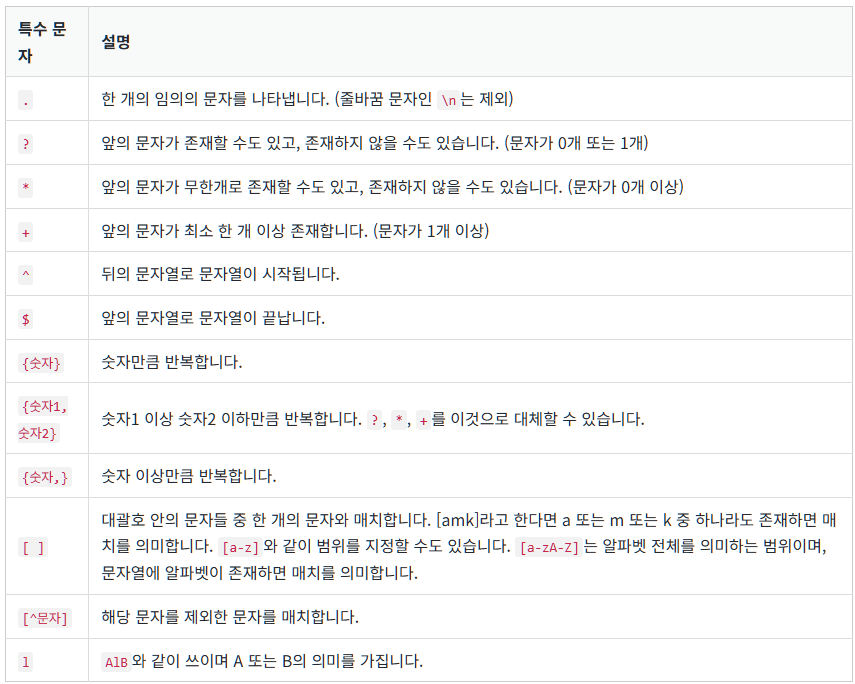

정규 표현식 문법에는 역 슬래쉬(`\`)를 이용하여 자주 쓰이는 **문자 규칙**들이 존재

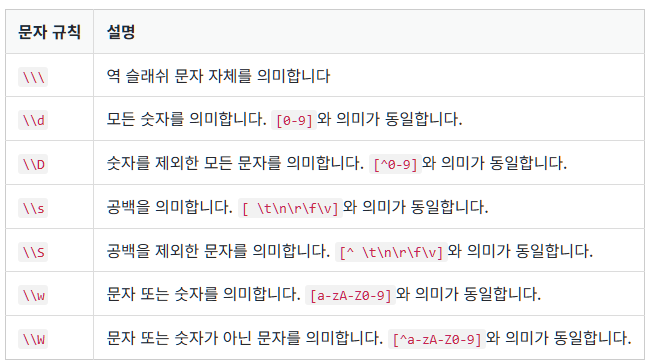

### 2) 정규표현식 모듈 함수

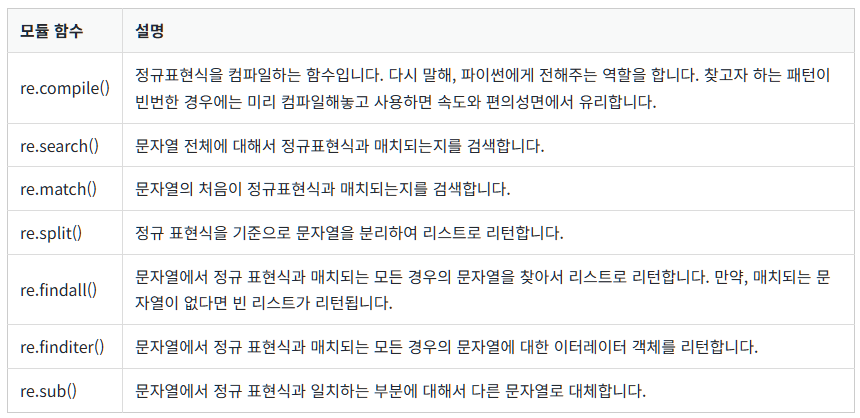

앞으로 진행될 실습에서는 아래와 같은 과정으로 진행함.
1. re.compile()에 정규표현식을 컴파일
2. re.search()를 통해 해당 정규 표현식이 입력 텍스트와 매치되는지를 확인
    - re.search()는 매치된다면 Match Object를 리턴하고
    - 매치되지 않으면 아무런 값도 출력되지 않음.

## 2. 정규 표현식 실습

In [ ]:
import re

### 1) . 기호

`.`은 **한 개의 임의의 문자**를 나타냄.

***Example***

정규표현식: a.c
- a와 c 사이에는 어떤 1개의 문자라도 올 수 있음
- akc, azc, avc 등등이 매치됨

In [ ]:
r = re.compile("a.c")
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

### 2) ? 기호

`?`는 ? 앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우

***Example***

정규표현식: ab?c
- b는 있다고 취급할 수도 있고, 없다고 취급할수도 있음

In [ ]:
r = re.compile("ab?c")
r.search("abbc")    # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("abc") # b가 있는 것으로 판단

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("ac")  # b가 없는 것으로 판단

<re.Match object; span=(0, 2), match='ac'>

### 3) * 기호

`*`: **바로 앞의 문자**가 0개 이상일 경우
- 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러개일 수도 있음

***Example***

정규표현식: ab*c
- ac, abc, abbc, abbbc등과 매치 가능
- b의 개수는 무수히 많을 수 있음

In [ ]:
r = re.compile("ab*c")
r.search("a")   # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

### 4) + 기호

+: 바로 앞의 문자가 최소 1개 이상
- `*`과 유사

***Example***

정규표현식: ab+c
- ac는 매치되지 X
- abc, abbc, abbbc등과 매치 가능
- b의 개수는 무수히 많을 수 있음

In [ ]:
r = re.compile("ab+c")
r.search("ac")  # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

### 5) ^ 기호

`^`: 시작되는 문자열을 지정

***Example***

정규표현식: ^ab
- 문자열 ab로 시작되는 경우에 매치

In [ ]:
r = re.compile("^ab")

# 아무런 결과도 출력되지 않는다.
r.search("bbc")

In [ ]:
r.search("zab")

In [ ]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

### 6) {숫자} 기호

`문자{숫자}`: 문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냄

***Example***

정규표현식: ab{2}c
- a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해 매치

In [ ]:
r = re.compile("ab{2}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")

In [ ]:
r.search("abc")

In [ ]:
r.search("abbbbc")

In [ ]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

### 7) {숫자1, 숫자2} 기호

문자{숫자1, 숫자2}: 문자에 해당 기호를 붙이면, 해당 문자를 `숫자1` 이상 `숫자2` 이하만큼 반복함

***Example***

정규표현식: ab{2,8}c
- a와 c 사이에 b가 존재하면서, b는 2개 이상 8개 이하인 문자열에 대해 매치

In [ ]:
r = re.compile("ab{2,8}c")

r.search("ac")  # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("abc")

In [ ]:
r.search("abbbbbbbbbbbc")

In [ ]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

### 8) {숫자,}기호

문자{숫자,}: 문자에 해당 기호를 붙이면 해당 문자를 숫자 이상만큼 반복함

***Example***

정규표현식:  a{2,}bc
- 뒤에 bc가 붙으면서, a가 2개 이상인 경우인 문자열과 매치
- {0,}: `*`과 동일한 의미
- {1,}: `+`과 동일한 의미

In [ ]:
r = re.compile("a{2,}bc")

# 아무런 결과도 출력되지 않는다.
r.search("bc")

In [ ]:
r.search("aa")

In [ ]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [ ]:
r.search("aaaaaabc")

<re.Match object; span=(0, 8), match='aaaaaabc'>

### [ ] 기호

`[]`: `[]`안에 문자들을 넣으면 그 문자들 중 1개의 문자와 매치

***Example***

정규표현식: [abc]
- a 또는 b 또는 c가 들어가 있는 문자열과 매치

범위 지정도 가능
- [a-zA-Z]: 알파벳 전부
- [0-9]: 숫자 전부

In [ ]:
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search("aaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search("baac")

<re.Match object; span=(0, 1), match='b'>

In [ ]:
# 알파벳 소문자에 대해 범위를 지정한 정규 표현식
r = re.compile("[a-z]")

# 아무런 결과도 출력되지 않는다.
r.search("AAA")

In [ ]:
r.search("111")

In [ ]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

### 10) [^문자]기호

`[^문자]`: ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치

***Example***

정규표현식: [^abc]
- a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치

In [ ]:
r = re.compile("[^abc]")

# 아무런 결과도 출력되지 않는다.
r.search("a")

In [ ]:
r.search("ab")

In [ ]:
r.search("b")

In [ ]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [ ]:
r.search("1")

<re.Match object; span=(0, 1), match='1'>

## 3. 정규 표현식 모듈 함수 에제

앞에서는 `re.compile()`과 `re.search()`를 사용함

### 1) re.match()와 re.search()의 차이

`search()`: 정규 표현식 전체에 대해서 문자열이 매치하는지를 봄

`match()`: 문자열의 첫 부분부터 정규표현식과 매치하는지를 확인
- 문자열 중간에 매치하는 패턴이 있더라도 match함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 X

In [ ]:
r = re.compile("ab.")   # ab다음에는 어떤 한 글자가 존재할 수 있다는 패턴
r.match("kkkabc")   # 아무런 결과도 출력되지 않는다.

In [ ]:
r.search("kkkabc")  # search()를 사용하는 경우

<re.Match object; span=(3, 6), match='abc'>

In [ ]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

### 2) re.split()

`split()`: 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴

In [ ]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""
re.split('\n', text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# `+`를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"
re.split("\+",text)

['사과', '딸기', '수박', '메론', '바나나']

### 3) re.findall()

`findall()`: 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
- 매치되는 문자열이 없다면 빈 리스트를 리턴함

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
re.findall('\d+', text) # 숫자를 의미하는 규칙

['010', '1234', '1234', '30']

In [ ]:
re.findall("\d+", "문자열입니다.")  # 입력 텍스트에 숫자가 없는 경우 빈 리스트 리턴

[]

### 4) re.sub()

`sub()`: 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체함
- 정제 작업에 많이 사용됨
    - 특수문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하면 됨

In [ ]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)  # 알파벳 외의 문자는 공백으로 처리함
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


## 4. 정규 표현식 텍스트 전처리 에제

In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

`\s+`: 공백문자가 1개 이상인 패턴을 찾아냄

In [ ]:
re.split('\s+',text)    # 기준으로 분리

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

`\d+`: 숫자가 1개 이상인 패턴을 찾아냄

In [ ]:
re.findall('\d+', text) # 매치하는 문장열을 다 찾아음

['100', '101', '102']

In [ ]:
re.findall('[A-Z]{4}', text)

['PROF', 'STUD', 'STUD']

In [ ]:
re.findall('[A-Z][a-z]+',text)  # 이름 = 대문자가 등장한 이후, 소문자가 여러번 등장하는 경우

['John', 'James', 'Mac']

## 5. 정규 표현식을 이용한 토큰화

NLTK에서는 정규표현식을 사용하여 단어 토큰화를 수행하는 RegexpTokenizer를 지원함
- `RegexpTokenizer()`: 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규표현식을 넣어 토큰화를 수행함
    - `gaps=True`: 토큰으로 나누기 위한 기준으로 해당 정규 표현식을 사용한다는 의미.
        - `gaps=True`를 기재하지 않으면 토큰화의 결과는 공백들만 나옴
        - 토큰화의 결과가 공백들(기준이 공백인게 아님)

In [2]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w+]")   # 문자 또는 숫자가 1개 이상인 경우
tokenizer2 = RegexpTokenizer("\s+", gaps=True)  # gaps=True: 해당 정규 표현식을 토큰으로 나누기 위한 기준으로 사용한다.
tokenizer3 = RegexpTokenizer("\s+")  # gaps=True: 해당 정규 표현식을 토큰으로 나누기 위한 기준으로 사용한다.

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))
print(tokenizer3.tokenize(text))

['D', 'o', 'n', 't', 'b', 'e', 'f', 'o', 'o', 'l', 'e', 'd', 'b', 'y', 't', 'h', 'e', 'd', 'a', 'r', 'k', 's', 'o', 'u', 'n', 'd', 'i', 'n', 'g', 'n', 'a', 'm', 'e', 'M', 'r', 'J', 'o', 'n', 'e', 's', 'O', 'r', 'p', 'h', 'a', 'n', 'a', 'g', 'e', 'i', 's', 'a', 's', 'c', 'h', 'e', 'e', 'r', 'y', 'a', 's', 'c', 'h', 'e', 'e', 'r', 'y', 'g', 'o', 'e', 's', 'f', 'o', 'r', 'a', 'p', 'a', 's', 't', 'r', 'y', 's', 'h', 'o', 'p']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


# 09-05 딥러닝을 위한 자연어 처리 전처리 실습

자연어 처리는 일반적으로 아래의 과정을 거침

1. 토큰화
2. 단어 집합 생성
3. 정수 인코딩
4. 패딩
5. 벡터화

> 이번 챕터에서는 이러한 전반적인 과정에 대해서 이해함

## 1. 토큰화(Tokenization)

토큰화: 주어진 텍스트를 단어 또는 문자 단위로 자르는 것
- 대표적 도구로 spaCy와 NLTK가 존재
- 파이썬 기본 함수인 split으로 토큰화도 가능

In [4]:
en_text = "A Dog Run back corner near spare bedrooms"   # 주어진 문장

### 1) spaCy 사용하기

In [13]:
import spacy
spacy_en = spacy.load('en_core_web_sm')

In [14]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [15]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 2) NLTK 사용하기

In [16]:
!pip install nltk

In [19]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 3) 띄어쓰기로 토큰화

In [21]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


영어의 경우: 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤 명확함.

한국어: 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식 되어서 단어 집합(vocabulary)의 크기가 불필요하게 커짐
- 단어 집합(vocabulary): 중복을 제거한 텍스트의 총 단어의 집합(set)

***Example***

> 예를 들어 단어 '사과'가 많이 들어간 어떤 문장에 띄어쓰기 토큰화를 한다면 '사과가', '사과를', '사과의', '사과와', '사과는'과 같은 식으로 같은 단어임에도 조사가 붙어서 다른 단어로 인식될 수 있습니다.

### 4) 한국어 띄어쓰기 토큰화

In [22]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [23]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


위와 같이 '의', '를', '가', '랑' 등의 조사를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됨

### 5) 형태소 토큰화

위와 같은 상황을 방지하기 위해 한국어는 보편적으로 '형태소 분석기'로 토큰화
- mecab을 사용해볼 것

In [24]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 29.6 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=b86e889b95a9d5fa3d0f0ee22b40eff6321789992c86dc999142e1da3b7f051e
  Stored in directory: /root/.cache/pip/wheels/a0/56/2c/eac72592ca2e80bdc46ff47d1fb327629e2a24e8cdc5aaf95f
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1656k      0 --:--:-- --:--:-- --:--:-- 1656k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/exam

In [25]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))   # 형태소 추출

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


형태소 분석기 사용시 조사가 전부 분리되어 '사과'라는 단어를 하나의 단어로 처리할 수 있음

### 6) 문자 토큰화
단어 또는 형태소 단위로 토큰화를 했지만, 이보다도 더 작은 단위인 문자 단위로 토큰화를 수행하는 경우도 있음

In [26]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


## 2. 단어 집합(Vocabulary) 생성

단어 집합(vocabulary): 중복을 제거한 텍스트의 총 단어의 집합(set)

> 네이버 영화 리뷰 분류하기 데이터를 사용할 것

In [35]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')  # 데이터 프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [37]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [38]:
sample_data = data[:100]    # 임의로 100개만 저장

***데이터 정제***

In [39]:
# 정규표현식을 통해 데이터 정제
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","",regex=True)   # 한글과 공백을 제외하고 모두 제거
sample_data[:10]

<ipython-input-39-cf59352368bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","",regex=True)   # 한글과 공백을 제외하고 모두 제거


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
5,2190435,사랑을해본사람이라면처음부터끝까지웃을수있는영화,1
6,9279041,완전감동입니다다시봐도감동,1
7,7865729,개들의전쟁나오나요나오면빠로보고싶음,1
8,7477618,굿,1
9,9250537,바보가아니라병쉰인듯,1


***토큰화 수행***

In [40]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [41]:
tokenizer=Mecab()
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence)   # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [42]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


***단어 집합 생성***

In [47]:
vocab = FreqDist(np.hstack(tokenized))  # FreqDist 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 dict 자료형과 유사
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 656


In [48]:
# 단어를 키(key)로, 단어에 대한 빈도수가 값(value)로 저장되어져 있음
vocab['재밌']

8

`most_common()`: 주어진 상위 빈도수의 단어만을 리턴함

In [49]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


## 3. 각 단어에 고유한 정수 부여

***단어에 인덱스 부여***

`enumerate()`: 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스와 데이터를 순차적으로 함께 리턴함

In [51]:
word_to_index = {word[0]: index+2 for index, word in enumerate(vocab)}  # 2부터 501까지 순차적으로 인덱스 부여
# index 1과 0은 다른 용도로 남겨둠
word_to_index['pad'] = 1
word_to_index['unk'] = 0

***각 단어를 고유한 정수로 부여***

In [52]:
encoded = []
for line in tokenized:  # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: # 각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w])   # 글자를 해당 되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 'unk'로 대체된다
            temp.append(word_to_index['unk'])

    encoded.append(temp)

In [53]:
print(encoded[:10])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10], [53, 30, 119, 207, 208, 209, 210, 64, 41, 31, 12, 211, 120, 16, 2, 212, 65, 8, 30, 3, 32], [213, 214, 215, 216, 7, 217, 14, 3], [121, 5, 23, 33, 39, 122, 123, 51, 117, 28, 85, 5, 15, 7, 3], [124, 34, 218, 38, 79, 34], [119, 219, 54, 220, 54, 86, 221, 35, 9, 4, 42, 29], [55], [222, 87, 88, 223, 224, 56, 89]]


## 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

패딩(padding): 정해준 길이로 모든 샘플들의 길이를 맞춰 주되, 정해준 길이보다 길이가 짧은 샘플들에는 'pad' 토큰을 추가하여 길이를 맞춰주는 작업
- pad: 현재 예시에서 패딩을 위한 토큰

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.510000


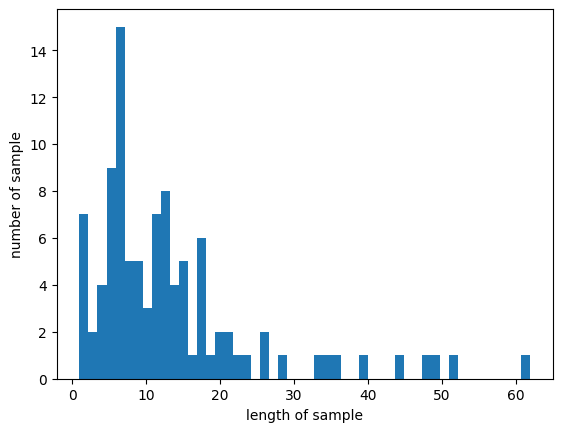

In [55]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
# map은 리스트의 요소를 지정된 함수로 처리해주는 함수
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded)) / len(encoded))) # -> encoded의 요소마다 len 함수로 처리
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [56]:
# 가장 길이가 긴 리뷰의 길이로 모든 리뷰의 길이를 통일
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len-len(line))    # 나머지는 전부 'pad' 토큰으로 채운다.

In [57]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded)) / len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [58]:
# 상위 3개의 샘플들만 출력
print(encoded[:3])

[[78, 25, 9, 4, 47, 38, 79, 22, 26, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [185, 5, 81, 186, 187, 188, 48, 189, 113, 5, 190, 191, 23, 114, 192, 193, 12, 49, 82, 115, 27, 48, 194, 116, 117, 28, 195, 5, 196, 197, 14, 113, 7, 63, 50, 14, 39, 198, 5, 199, 4, 200, 15, 7, 83, 40, 201, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [202, 118, 203, 51, 204, 28, 205, 206, 52, 13, 29, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


이후에는 각 정수를 고유한 단어 벡터로 바꾸는 작업(벡터화)이 필요함. 단어 벡터를 얻는 방법은 크게 아래 2개.
1. 원-핫 인코딩
2. **워드 임베딩**
    - 주로 워드 임베딩이 사용됨